In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd '/content/drive/My Drive/IIIT_B/ML/ML Project 2/MultiClass/'

/content/drive/My Drive/IIIT_B/ML/ML Project 2/MultiClass


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('covtype.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


### Dataset Observations

In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [8]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


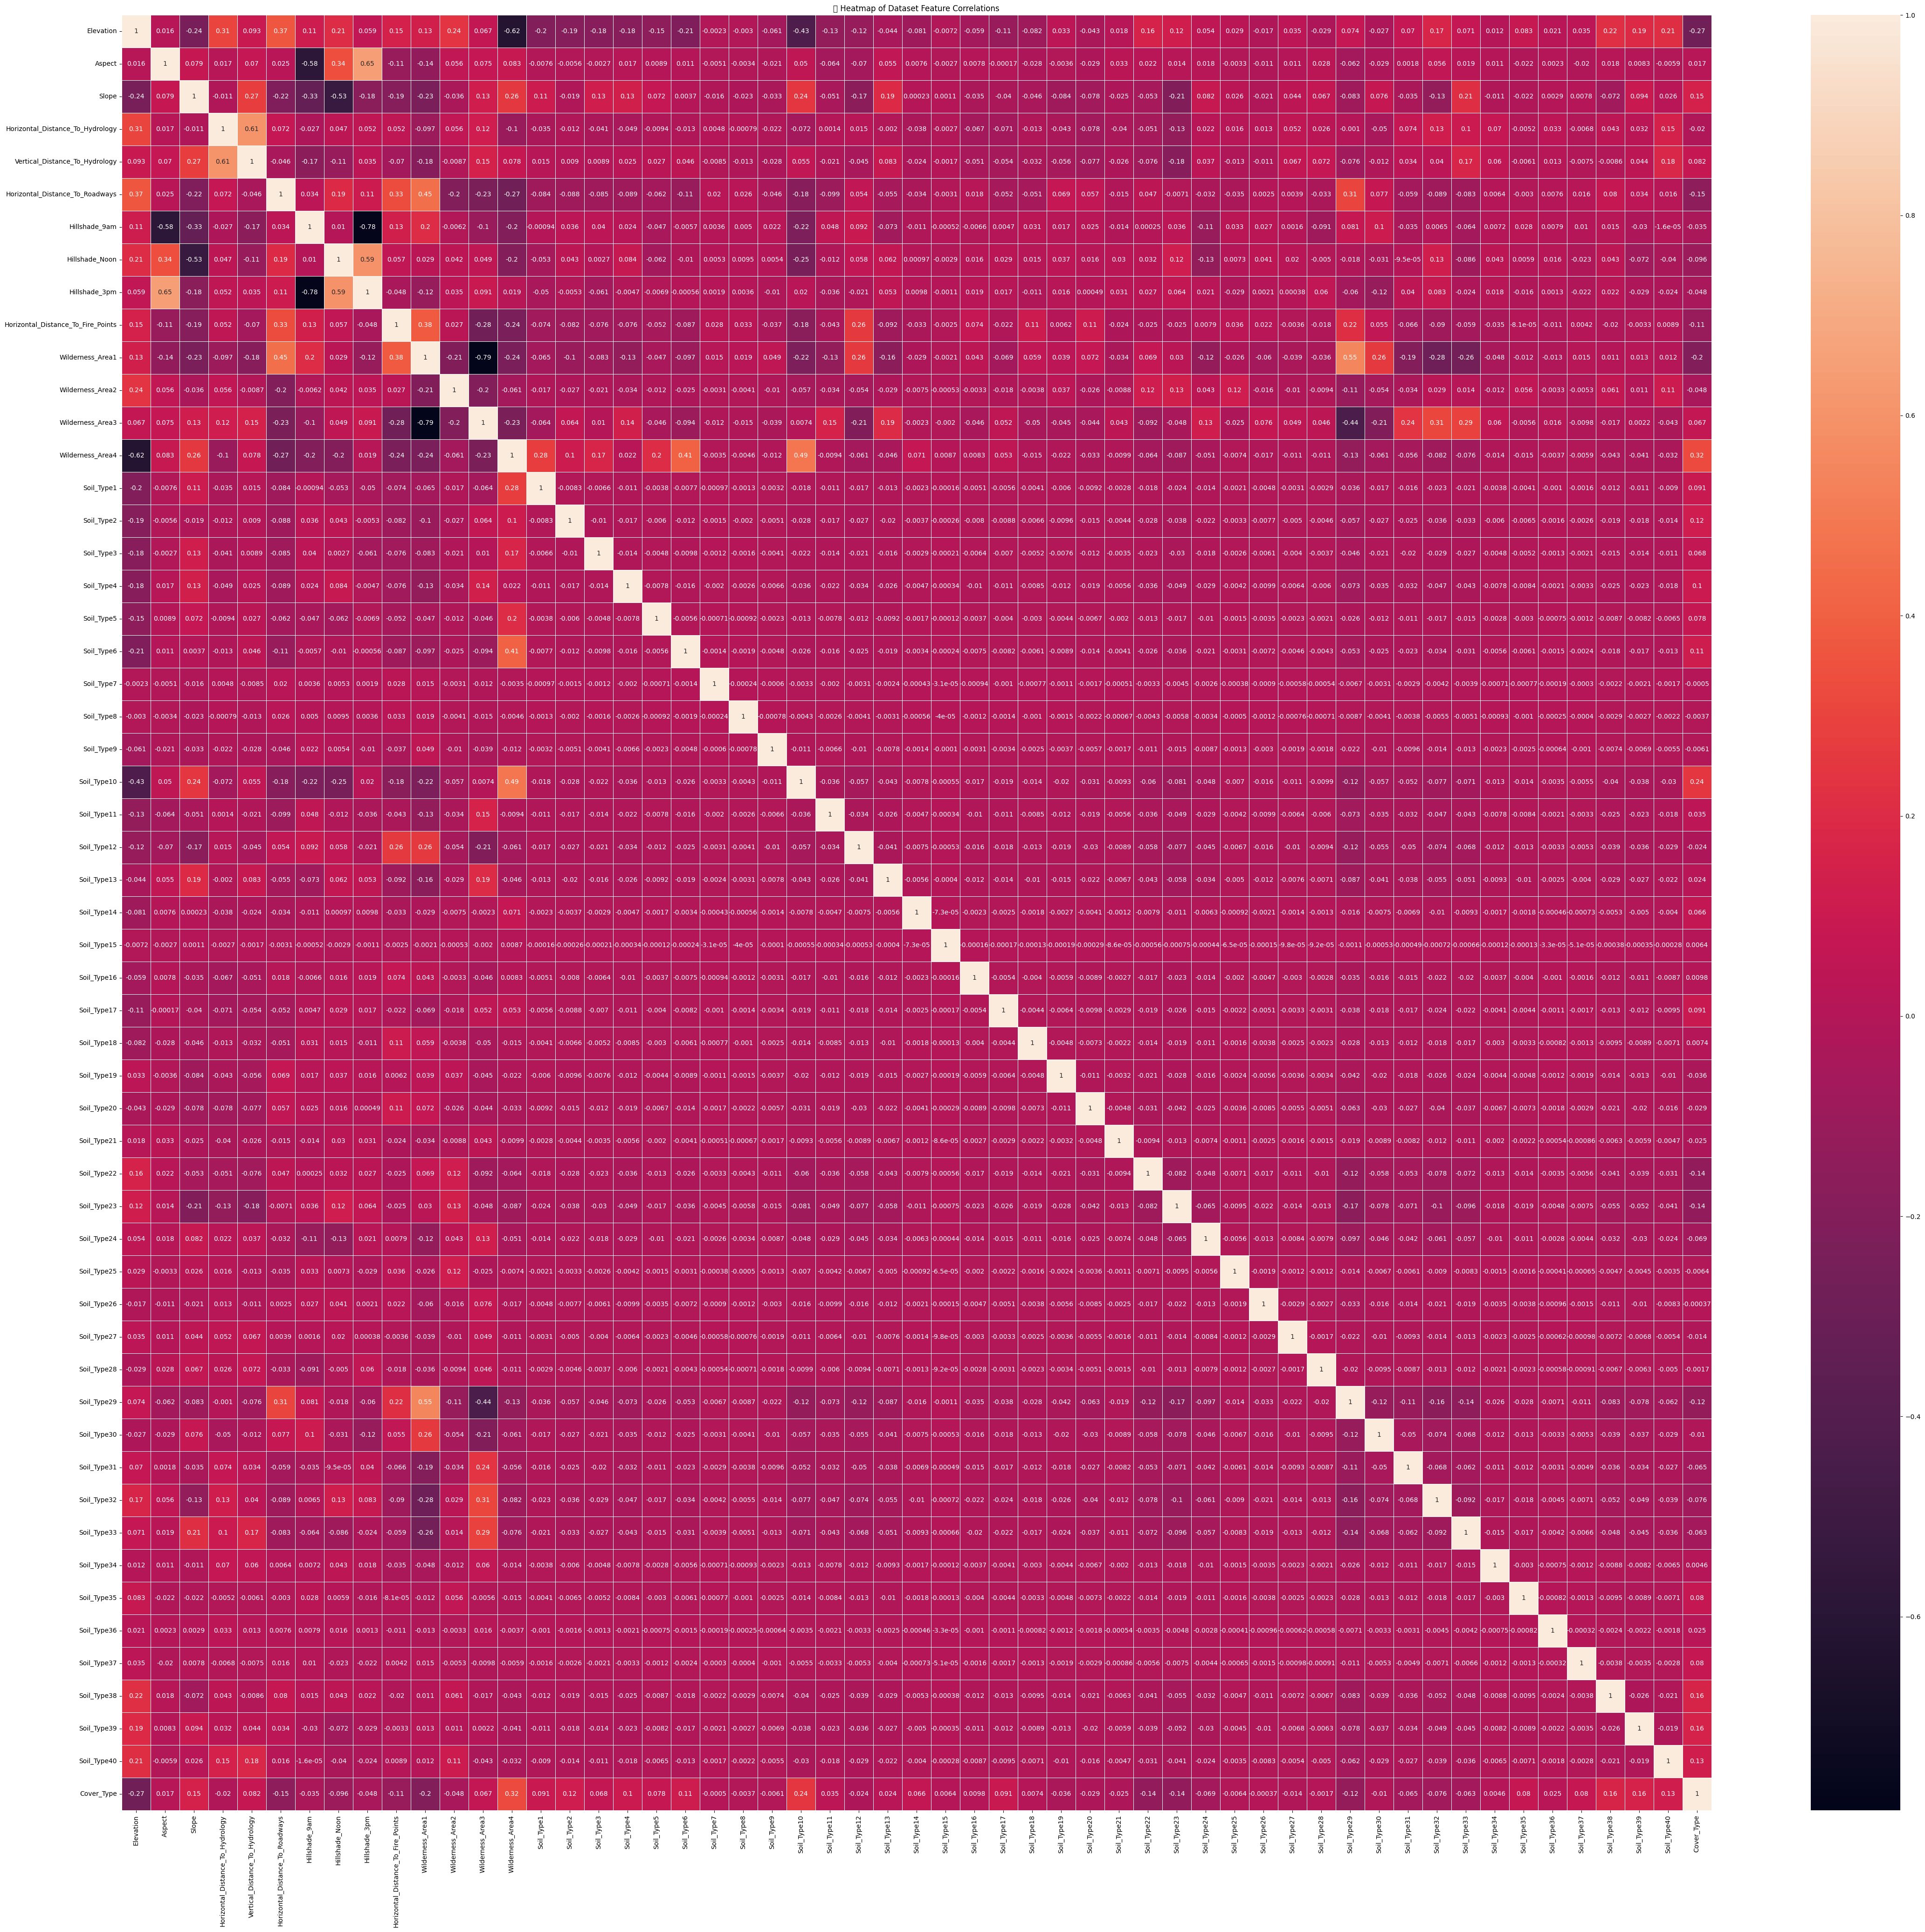

In [9]:
plt.figure(figsize=(55, 50))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('🔶 Heatmap of Dataset Feature Correlations')
plt.show()


VISUALIZING DISTRIBUTIONS
----------------------------------------


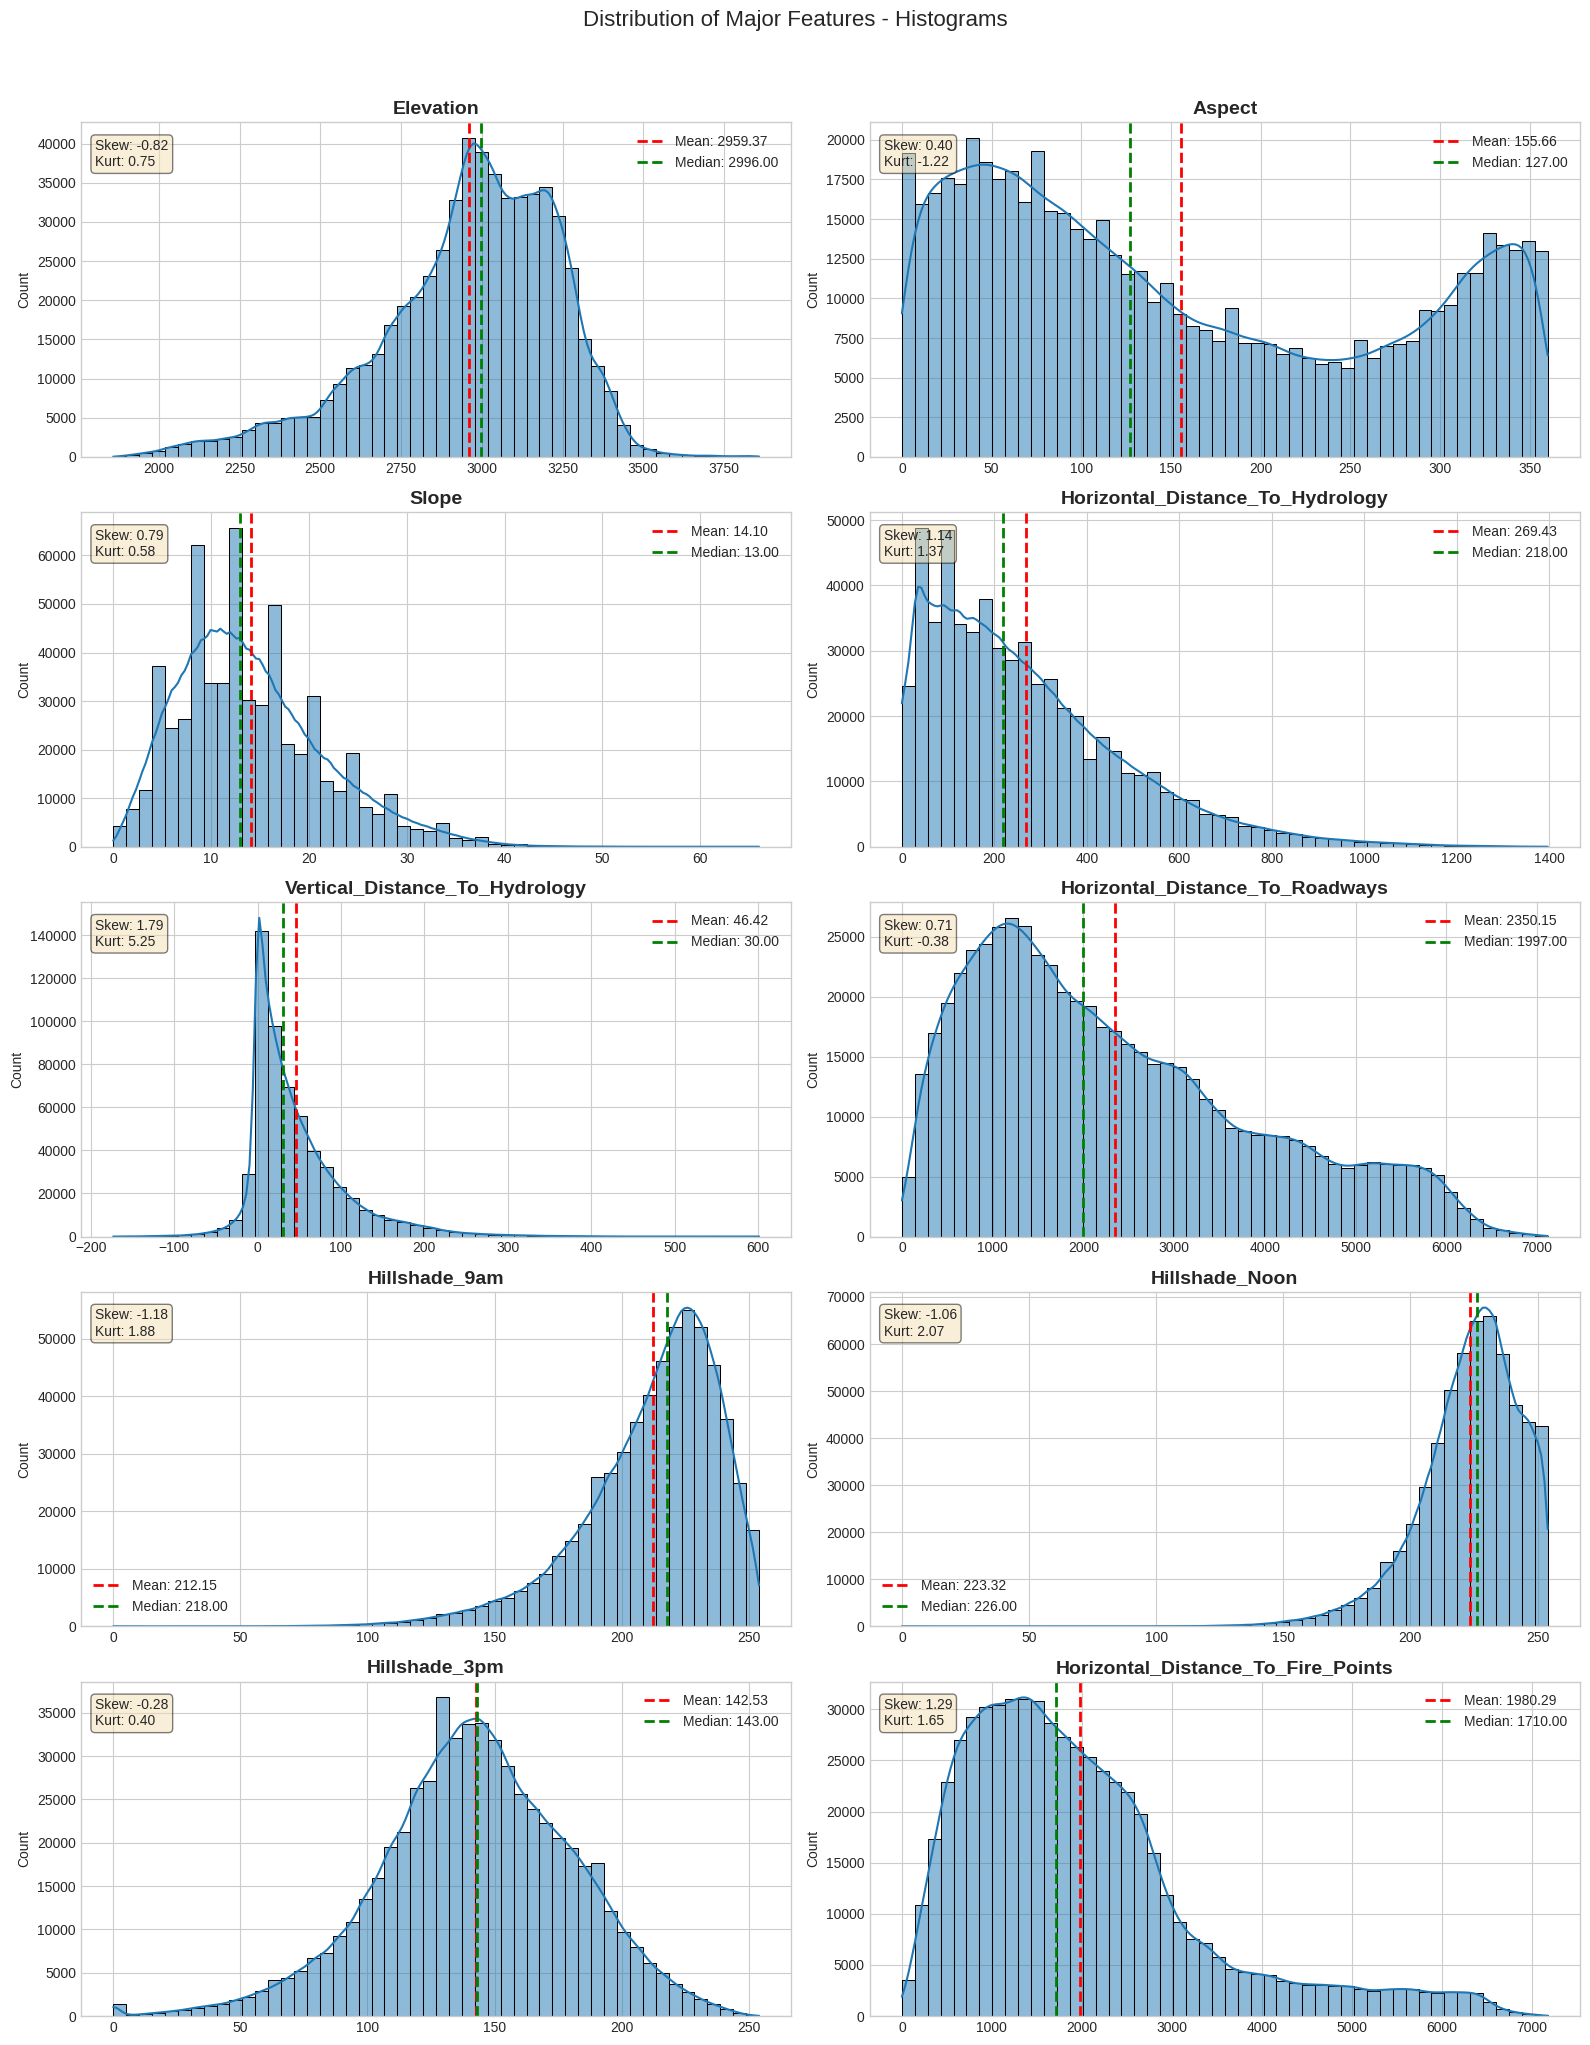

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("tab10")


# 3. Identify major continuous features (first 10 columns)
major_features = df.columns[:10].tolist()  # First 10 features
major_features.append('Cover_Type')  # Add target for distribution analysis

# 6. Visualization: Histograms and boxplots for each major feature
print("\nVISUALIZING DISTRIBUTIONS")
print("-"*40)

# Create subplots for histograms
fig1, axes1 = plt.subplots(5, 2, figsize=(16, 20))
fig1.suptitle('Distribution of Major Features - Histograms', fontsize=16, y=1.02)

for idx, feature in enumerate(major_features[:-1]):  # Exclude target
    row = idx // 2
    col = idx % 2
    ax = axes1[row, col]

    # Histogram with KDE
    sns.histplot(data=df, x=feature, kde=True, ax=ax, bins=50)
    ax.axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    ax.axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[feature].median():.2f}')
    ax.set_title(f'{feature}', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.legend()

    # Add skewness/kurtosis info
    skew_val = df[feature].skew()
    kurt_val = df[feature].kurtosis()
    ax.text(0.02, 0.95, f'Skew: {skew_val:.2f}\nKurt: {kurt_val:.2f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()



In [12]:
# Target variable distribution

target_counts = df['Cover_Type'].value_counts().sort_index()
target_percent = (df['Cover_Type'].value_counts(normalize=True) * 100).sort_index()

target_dist = pd.DataFrame({
    'Cover_Type': target_counts.index,
    'Count': target_counts.values,
    'Percentage': target_percent.values.round(2)
})


TARGET VARIABLE VISUALIZATION
----------------------------------------


/tmp/ipython-input-2174815747.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(target_dist['Cover_Type'].astype(str), rotation=0)


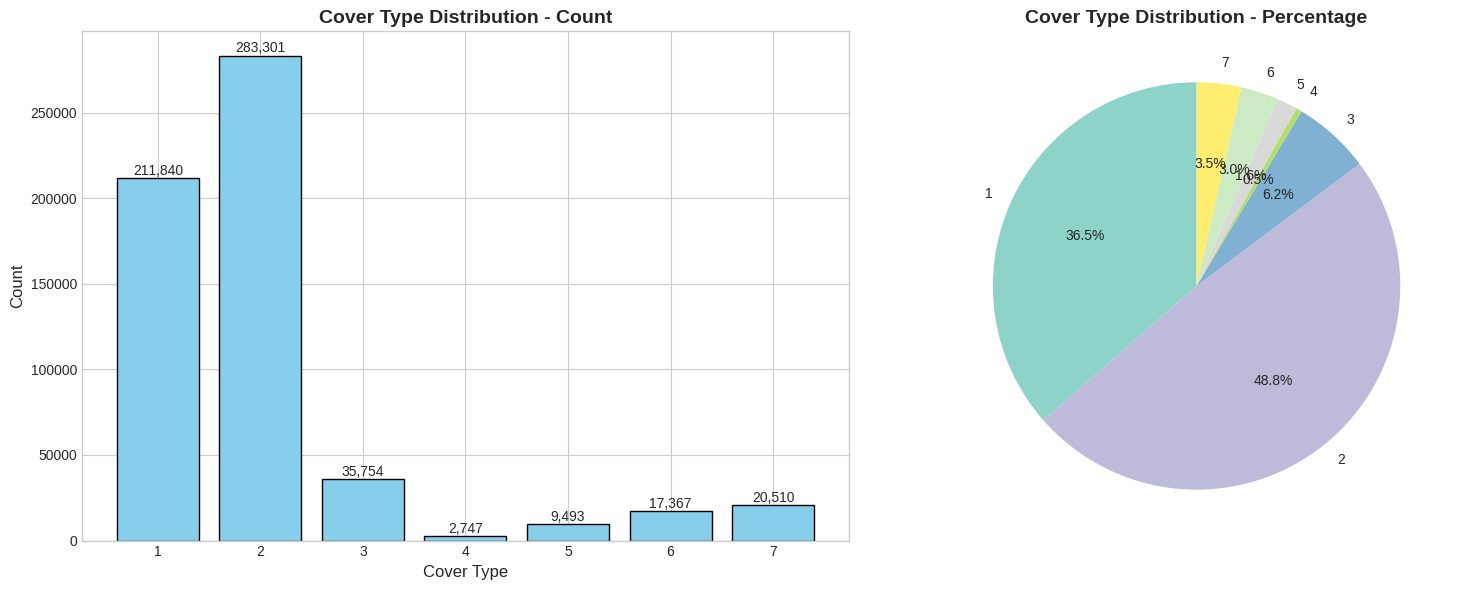

In [13]:
# Target variable distribution visualization
print("\nTARGET VARIABLE VISUALIZATION")
print("-"*40)

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
bars = ax1.bar(target_dist['Cover_Type'].astype(str), target_dist['Count'], color='skyblue', edgecolor='black')
ax1.set_title('Cover Type Distribution - Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cover Type', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(target_dist['Cover_Type'].astype(str), rotation=0)

# Add count labels on bars
for bar, count in zip(bars, target_dist['Count']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{count:,}', ha='center', va='bottom', fontsize=10)

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(target_dist)))
wedges, texts, autotexts = ax2.pie(target_dist['Percentage'],
                                   labels=target_dist['Cover_Type'].astype(str),
                                   autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Cover Type Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


FEATURE DISTRIBUTIONS BY COVER TYPE
----------------------------------------


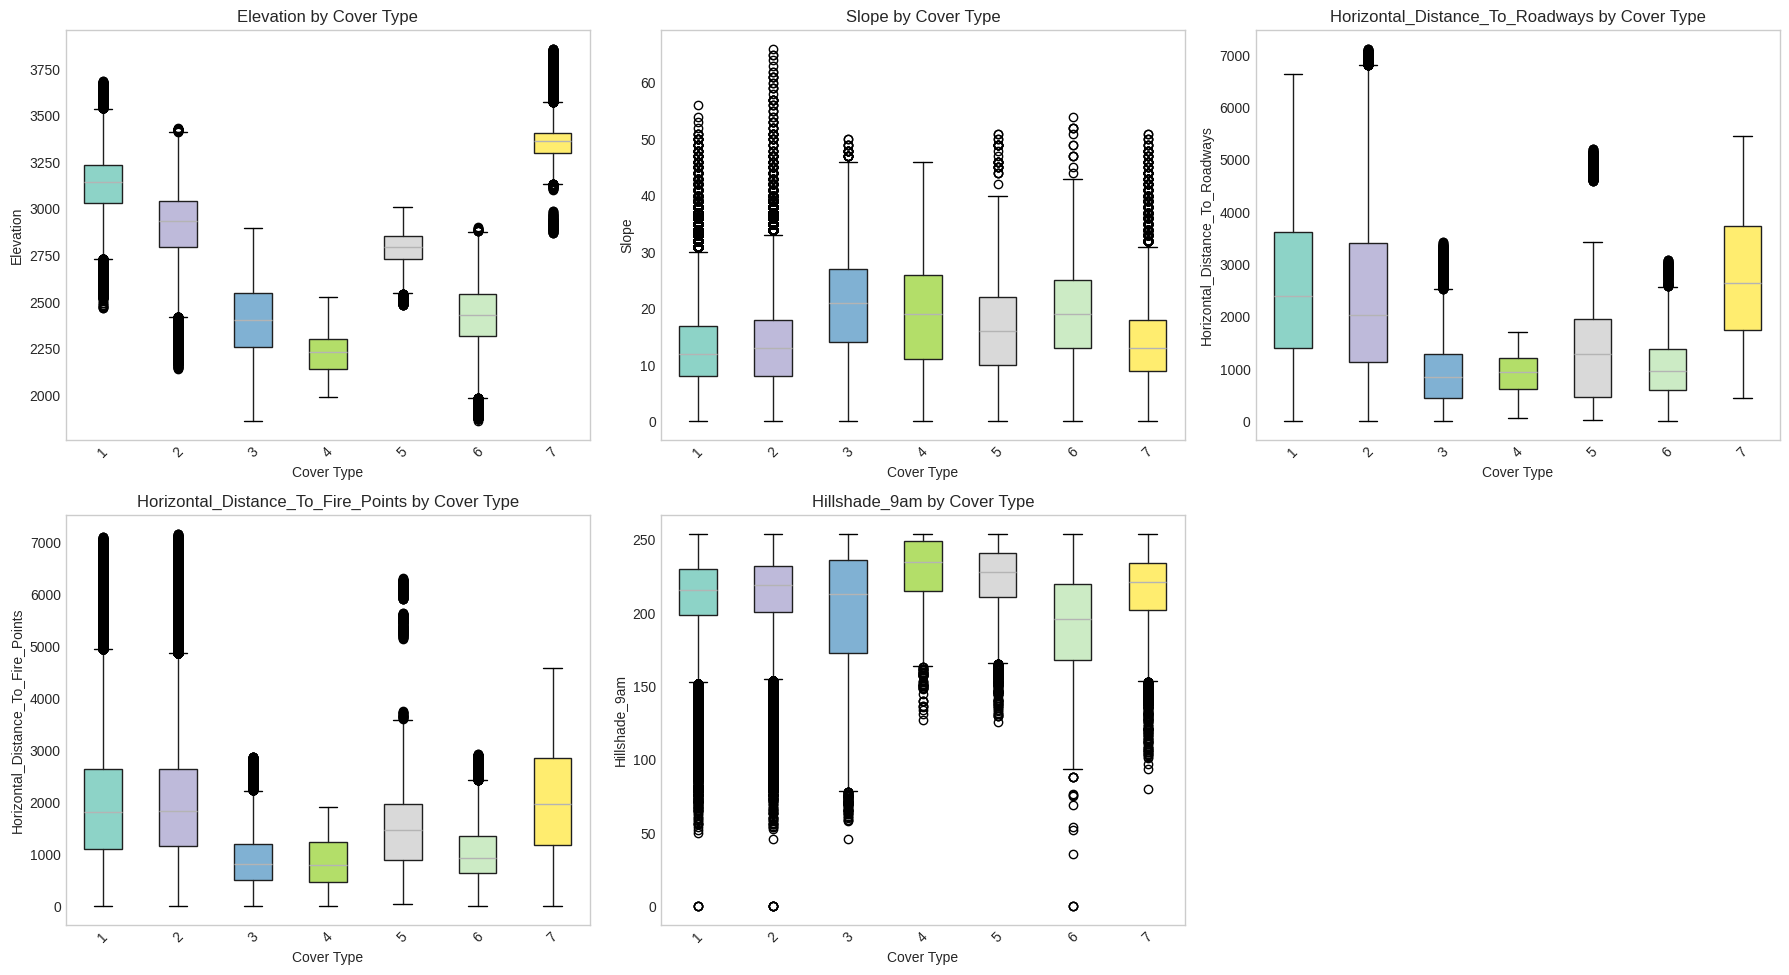

In [14]:
# BOXPLOTS BY TARGET CLASS
print("\nFEATURE DISTRIBUTIONS BY COVER TYPE")
print("-"*40)

# Select key features for boxplot analysis
boxplot_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways',
                    'Horizontal_Distance_To_Fire_Points', 'Hillshade_9am']

fig3, axes3 = plt.subplots(2, 3, figsize=(18, 10))
fig3.suptitle('Feature Distributions by Cover Type', fontsize=16, y=1.05)
axes3 = axes3.flatten()

for idx, feature in enumerate(boxplot_features[:6]):
    ax = axes3[idx]

    # Create boxplot
    boxplot = df.boxplot(column=feature, by='Cover_Type', ax=ax,
                        patch_artist=True, grid=False)

    # Customize colors
    colors = plt.cm.Set3(np.linspace(0, 1, 7))
    for patch, color in zip(boxplot.findobj(plt.matplotlib.patches.PathPatch), colors):
        patch.set_facecolor(color)

    ax.set_title(f'{feature} by Cover Type', fontsize=12)
    ax.set_xlabel('Cover Type')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot if needed
if len(boxplot_features) < 6:
    for i in range(len(boxplot_features), 6):
        fig3.delaxes(axes3[i])

plt.suptitle('')  # Remove default subtitle
plt.tight_layout()
plt.show()


PAIRPLOT OF KEY FEATURES COLORED BY TARGET
----------------------------------------
Creating pairplot... This may take a moment...


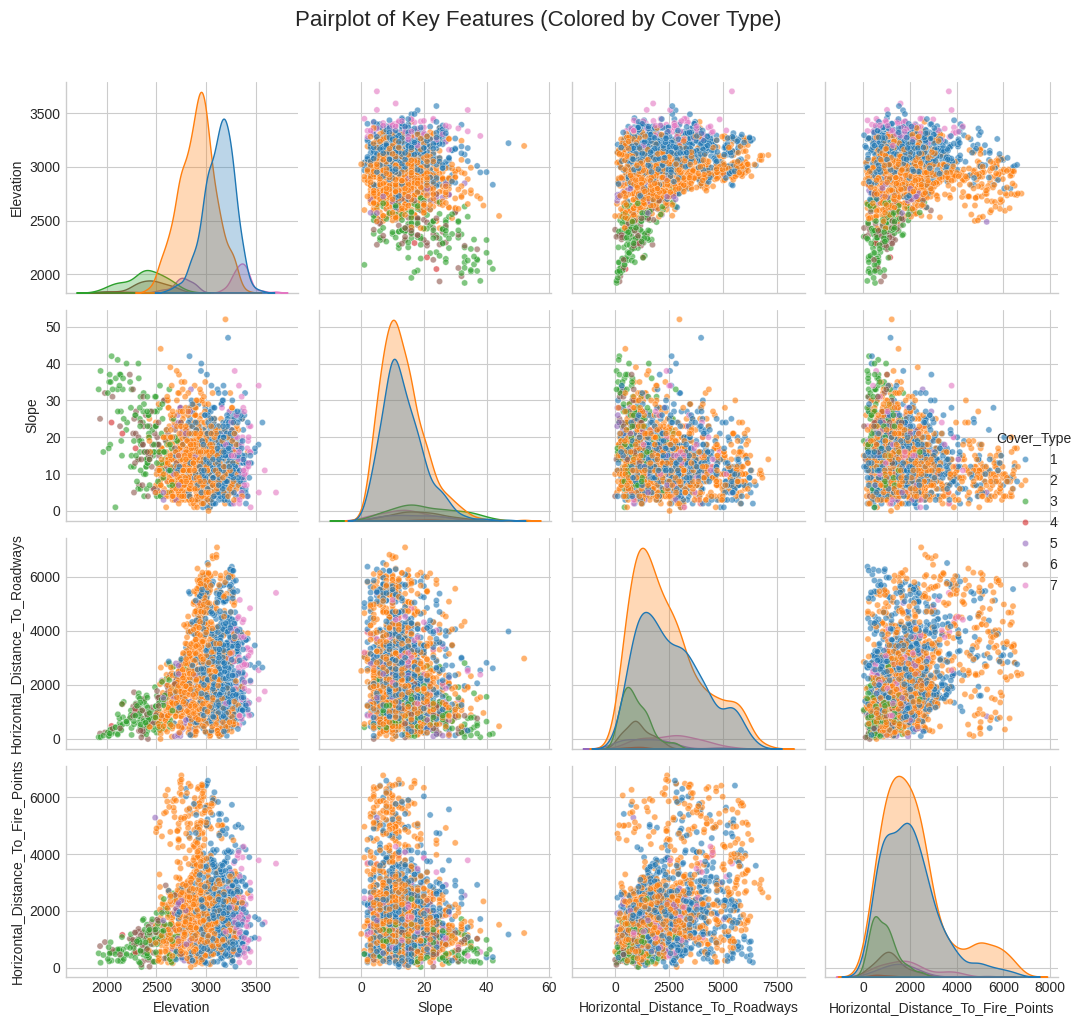

In [15]:
# PAIRPLOT FOR SELECTED FEATURES
print("\nPAIRPLOT OF KEY FEATURES COLORED BY TARGET")
print("-"*40)

# Select subset of features for pairplot (to avoid overcrowding)
pairplot_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways',
                     'Horizontal_Distance_To_Fire_Points', 'Cover_Type']

print("Creating pairplot... This may take a moment...")

# Sample data for faster visualization (if dataset is large)
sample_df = df[pairplot_features].sample(n=2000, random_state=42)

g = sns.pairplot(sample_df, hue='Cover_Type', diag_kind='kde',
                 palette='tab10', plot_kws={'alpha': 0.6, 's': 20},
                 diag_kws={'fill': True, 'alpha': 0.3})

g.fig.suptitle('Pairplot of Key Features (Colored by Cover Type)',
               fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


 RADAR CHART - FEATURE PROFILE BY COVER TYPE
----------------------------------------


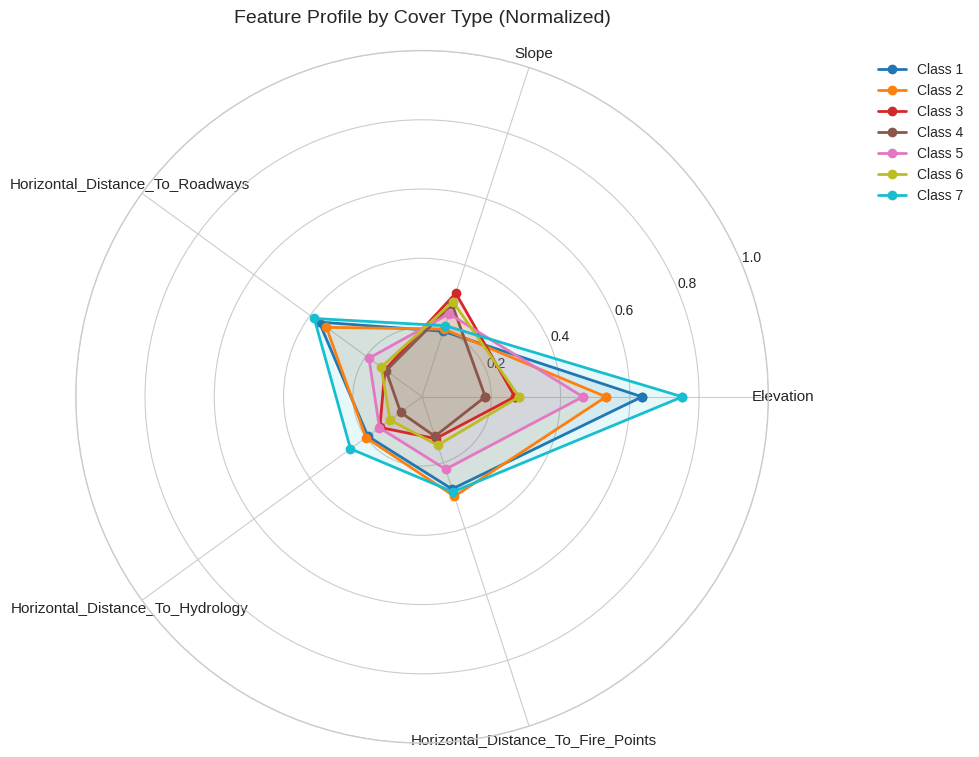


BIVARIATE ANALYSIS COMPLETE


In [16]:
# RADAR CHART FOR FEATURE PROFILE BY CLASS
print("\n RADAR CHART - FEATURE PROFILE BY COVER TYPE")
print("-"*40)

# Select features for radar chart
radar_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways',
                  'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points']

# Normalize features for radar chart
df_normalized = df.copy()
for feature in radar_features:
    df_normalized[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

# Calculate average normalized values by class
radar_data = pd.DataFrame()
for ct in sorted(df['Cover_Type'].unique()):
    radar_data[f'Class {ct}'] = df_normalized[df_normalized['Cover_Type'] == ct][radar_features].mean()

# Create radar chart
angles = np.linspace(0, 2*np.pi, len(radar_features), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig10, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors = plt.cm.tab10(np.linspace(0, 1, 7))

for idx, class_label in enumerate(radar_data.columns):
    values = radar_data[class_label].values.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=class_label, color=colors[idx])
    ax.fill(angles, values, alpha=0.1, color=colors[idx])

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_features, fontsize=11)
ax.set_ylim(0, 1)
ax.set_title('Feature Profile by Cover Type (Normalized)', fontsize=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("BIVARIATE ANALYSIS COMPLETE")
print("="*80)

### Model Training

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
df = pd.read_csv("covtype.csv")

In [ ]:
y = df["Cover_Type"]
X = df.drop(columns=["Cover_Type"])

In [ ]:
# 2.1 Remove duplicate rows
df = df.drop_duplicates()

# # 2.2 Handle missing values
X = X.fillna(X.median())

# 2.3 Outlier handling: IQR capping
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

X = X.clip(lower=lower, upper=upper, axis=1)

In [ ]:
df.shape

(581012, 55)

In [ ]:
# TRAIN / VALIDATION / TEST SPLIT
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [ ]:
# SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
def train_and_eval(model, name):
    model.fit(X_train, y_train)

    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    print(f"\n{name}")
    print("-" * len(name))
    print("Validation Accuracy:", accuracy_score(y_val, val_pred))
    print("Test Accuracy:", accuracy_score(y_test, test_pred))
    return model

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial")
train_and_eval(log_reg, "Logistic Regression")

# SVM
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
train_and_eval(svm_model, "SVM (RBF kernel)")

# -------------------------------------------------------
# 7. Neural Networks with different depths
# -------------------------------------------------------

# 2-layer MLP
mlp_2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu',
                      max_iter=300)
train_and_eval(mlp_2, "Neural Network (2 layers)")

# 3-layer MLP
mlp_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu',
                      max_iter=300)
train_and_eval(mlp_3, "Neural Network (3 layers)")

# 5-layer MLP
mlp_5 = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16),
                      activation='relu', max_iter=300)
train_and_eval(mlp_5, "Neural Network (5 layers)")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
-------------------
Validation Accuracy: 0.7051857971463485
Test Accuracy: 0.7029534267322983


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network (2 layers)
-------------------------
Validation Accuracy: 0.8969208791587064
Test Accuracy: 0.8968193865959864


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network (3 layers)
-------------------------
Validation Accuracy: 0.9428237035507134
Test Accuracy: 0.9432893876286531


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network (5 layers)
-------------------------
Validation Accuracy: 0.945835699901895
Test Accuracy: 0.9461292210250938
